In [1]:
import os
filename = 'criteo_sample.txt'
path = os.path.join(os.getcwd(), filename)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
from deepctr.models import DeepFM
from deepctr.inputs import SparseFeat, DenseFeat,get_fixlen_feature_names

In [105]:
data = pd.read_csv(path)
data.head(7)

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,NaN,3,260.0,NaN,17668.0,NaN,NaN,33.0,NaN,...,e5ba7672,87c6f83c,NaN,NaN,0429f84b,NaN,3a171ecb,c0d61a5c,NaN,NaN
1,0,NaN,-1,19.0,35.0,30251.0,247.0,1.0,35.0,160.0,...,d4bb7bd8,6fc84bfb,NaN,NaN,5155d8a3,NaN,be7c41b4,ded4aac9,NaN,NaN
2,0,0.0,0,2.0,12.0,2013.0,164.0,6.0,35.0,523.0,...,e5ba7672,675c9258,NaN,NaN,2e01979f,NaN,bcdee96c,6d5d1302,NaN,NaN
3,0,NaN,13,1.0,4.0,16836.0,200.0,5.0,4.0,29.0,...,e5ba7672,52e44668,NaN,NaN,e587c466,NaN,32c7478e,3b183c5c,NaN,NaN
4,0,0.0,0,104.0,27.0,1990.0,142.0,4.0,32.0,37.0,...,e5ba7672,25c88e42,21ddcdc9,b1252a9d,0e8585d2,NaN,32c7478e,0d4a6d1a,001f3601,92c878de
5,0,0.0,-1,63.0,40.0,1470.0,61.0,4.0,37.0,46.0,...,e5ba7672,d3303ea5,21ddcdc9,b1252a9d,7633c7c8,NaN,32c7478e,17f458f7,001f3601,71236095
6,0,0.0,370,4.0,1.0,1787.0,65.0,14.0,25.0,489.0,...,3486227d,642f2610,55dd3565,b1252a9d,5c8dc711,NaN,423fab69,45ab94c8,2bf691b1,c84c4aec


In [9]:
data.columns

Index(['label', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
       'I11', 'I12', 'I13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26'],
      dtype='object')

In [55]:
sparse_feats= ['C'+str(i) for i in range(1,27)]
dense_feats = ['I'+str(i) for i in range(1, 14)]

In [148]:
y = ['label']#holds traget value

In [106]:
data[sparse_feats].head(7)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,05db9164,08d6d899,9143c832,f56b7dd5,25c83c98,7e0ccccf,df5c2d18,0b153874,a73ee510,8f48ce11,...,e5ba7672,87c6f83c,NaN,NaN,0429f84b,NaN,3a171ecb,c0d61a5c,NaN,NaN
1,68fd1e64,04e09220,95e13fd4,a1e6a194,25c83c98,fe6b92e5,f819e175,062b5529,a73ee510,ab9456b4,...,d4bb7bd8,6fc84bfb,NaN,NaN,5155d8a3,NaN,be7c41b4,ded4aac9,NaN,NaN
2,05db9164,38a947a1,3f55fb72,5de245c7,30903e74,7e0ccccf,b72ec13d,1f89b562,a73ee510,acce978c,...,e5ba7672,675c9258,NaN,NaN,2e01979f,NaN,bcdee96c,6d5d1302,NaN,NaN
3,05db9164,8084ee93,02cf9876,c18be181,25c83c98,NaN,e14874c9,0b153874,7cc72ec2,2462946f,...,e5ba7672,52e44668,NaN,NaN,e587c466,NaN,32c7478e,3b183c5c,NaN,NaN
4,05db9164,207b2d81,5d076085,862b5ba0,25c83c98,fbad5c96,17c22666,0b153874,a73ee510,534fc986,...,e5ba7672,25c88e42,21ddcdc9,b1252a9d,0e8585d2,NaN,32c7478e,0d4a6d1a,001f3601,92c878de
5,68fd1e64,207b2d81,9dd3c4fc,a09fab49,25c83c98,NaN,271190b7,5b392875,a73ee510,49d5fa15,...,e5ba7672,d3303ea5,21ddcdc9,b1252a9d,7633c7c8,NaN,32c7478e,17f458f7,001f3601,71236095
6,05db9164,2a69d406,fcae8bfa,13508380,25c83c98,NaN,cd846c62,0b153874,a73ee510,3b08e48b,...,3486227d,642f2610,55dd3565,b1252a9d,5c8dc711,NaN,423fab69,45ab94c8,2bf691b1,c84c4aec


In [41]:
data[dense_feats].head(7)

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13
0,0.0,3,260.0,0.0,17668.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1,19.0,35.0,30251.0,247.0,1.0,35.0,160.0,0.0,1.0,0.0,35.0
2,0.0,0,2.0,12.0,2013.0,164.0,6.0,35.0,523.0,0.0,3.0,0.0,18.0
3,0.0,13,1.0,4.0,16836.0,200.0,5.0,4.0,29.0,0.0,2.0,0.0,4.0
4,0.0,0,104.0,27.0,1990.0,142.0,4.0,32.0,37.0,0.0,1.0,0.0,27.0
5,0.0,-1,63.0,40.0,1470.0,61.0,4.0,37.0,46.0,0.0,1.0,0.0,40.0
6,0.0,370,4.0,1.0,1787.0,65.0,14.0,25.0,489.0,0.0,7.0,0.0,25.0


In [107]:
#substituting NaNs 
data[sparse_feats] = data[sparse_feats].fillna('-1', )
data[dense_feats] = data[dense_feats].fillna(0,)

In [108]:
le= preprocessing.LabelEncoder()
le.fit(data['C19'])
le.classes_#unique classes in data['C19'] before fit_transform method

array(['-1', '0053530c', '083e89d9', '1d04f4a4', '1d1eb838', '21ddcdc9',
       '2442feac', '2b558521', '2e30f394', '2f4b9dd2', '39e30682',
       '42e59f55', '444a605d', '49463d54', '4a237258', '4b1019ff',
       '4cc48856', '54591762', '55dd3565', '566c492c', '5b885066',
       '6301e460', '6d82104d', '6f3756eb', '712d530c', '738584ec',
       '7be4df37', '92524a76', 'a34d2cf6', 'af1445c4', 'b1fb78cc',
       'b6baba3f', 'ba92e49d', 'bdffef68', 'bf212c4c', 'c79aad78',
       'cc4c70c1', 'cf99e5de', 'd913d8f1', 'e27c6abe', 'edb3d180',
       'f30f7842', 'fc134659', 'ff6cdd42'], dtype=object)

In [117]:
le.fit(le.fit_transform(data['C19']))
le.classes_#unique classes in C19 after fit_transform method

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [122]:
#label encoding sparse features
from sklearn import preprocessing
for feat in sparse_feats:
    le = preprocessing.LabelEncoder()
    data[feat]=le.fit_transform(data[feat])
    
data[sparse_feats].head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,4,96,146,1,4,163,1,1,72,...,8,66,0,0,3,0,1,96,0,0
1,11,1,98,98,1,6,179,0,1,89,...,7,52,0,0,47,0,7,112,0,0
2,0,18,39,52,3,4,140,2,1,93,...,8,49,0,0,25,0,6,53,0,0
3,0,45,7,117,1,0,164,1,0,20,...,8,37,0,0,156,0,0,32,0,0
4,0,11,59,77,1,5,18,1,1,45,...,8,14,5,3,9,0,0,5,1,47


In [ ]:
#hash encoding
#for feat in sparse_feats:
#    lbe = HashEncoder()
#    data[feat] = lbe.transform(data[feat])

In [36]:
#le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [37]:
#list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [40]:
#le.transform(["paris","paris","amsterdam", "tokyo", "tokyo", "paris"])

array([1, 1, 0, 2, 2, 1], dtype=int64)

In [123]:
#discretizing dense features
mms = MinMaxScaler(feature_range=(0,1))
data[dense_feats] = mms.fit_transform(data[dense_feats])
data[dense_feats].head(5)

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13
0,0.0,0.001332,0.092362,0.000000,0.034825,0.000000,0.000000,0.673469,0.000000,0.0,0.00000,0.0,0.000000
1,0.0,0.000000,0.006750,0.402299,0.059628,0.117284,0.003322,0.714286,0.154739,0.0,0.03125,0.0,0.343137
2,0.0,0.000333,0.000710,0.137931,0.003968,0.077873,0.019934,0.714286,0.505803,0.0,0.09375,0.0,0.176471
3,0.0,0.004664,0.000355,0.045977,0.033185,0.094967,0.016611,0.081633,0.028046,0.0,0.06250,0.0,0.039216
4,0.0,0.000333,0.036945,0.310345,0.003922,0.067426,0.013289,0.653061,0.035783,0.0,0.03125,0.0,0.264706


In [124]:
#Generating feature columns
sparse_feature_cols = [SparseFeat(feat, dimension=data[feat].nunique())
                        for feat in sparse_feats]
dense_feature_cols = [DenseFeat(feat, 1)
                      for feat in dense_feats]


In [125]:
sparse_feature_cols[:4]#4/27 sparse feature cols

[SparseFeat(name='C1', dimension=27, use_hash=False, dtype='int32', embedding_name='C1', embedding=True),
 SparseFeat(name='C2', dimension=92, use_hash=False, dtype='int32', embedding_name='C2', embedding=True),
 SparseFeat(name='C3', dimension=172, use_hash=False, dtype='int32', embedding_name='C3', embedding=True),
 SparseFeat(name='C4', dimension=157, use_hash=False, dtype='int32', embedding_name='C4', embedding=True)]

In [126]:
dense_feature_cols[:4] #4/13 dense feature cols

[DenseFeat(name='I1', dimension=1, dtype='float32'),
 DenseFeat(name='I2', dimension=1, dtype='float32'),
 DenseFeat(name='I3', dimension=1, dtype='float32'),
 DenseFeat(name='I4', dimension=1, dtype='float32')]

In [133]:
dnn_feature_cols = sparse_feature_cols + dense_feature_cols
linear_feature_cols = sparse_feature_cols + dense_feature_cols

feature_names = get_fixlen_feature_names(linear_feature_cols + dnn_feature_cols)
print(feature_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13']


In [128]:
data.head(5)

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,0.0,0.001332,0.092362,0.000000,0.034825,0.000000,0.000000,0.673469,0.000000,...,8,66,0,0,3,0,1,96,0,0
1,0,0.0,0.000000,0.006750,0.402299,0.059628,0.117284,0.003322,0.714286,0.154739,...,7,52,0,0,47,0,7,112,0,0
2,0,0.0,0.000333,0.000710,0.137931,0.003968,0.077873,0.019934,0.714286,0.505803,...,8,49,0,0,25,0,6,53,0,0
3,0,0.0,0.004664,0.000355,0.045977,0.033185,0.094967,0.016611,0.081633,0.028046,...,8,37,0,0,156,0,0,32,0,0
4,0,0.0,0.000333,0.036945,0.310345,0.003922,0.067426,0.013289,0.653061,0.035783,...,8,14,5,3,9,0,0,5,1,47


In [145]:
train, test = train_test_split(data, test_size=0.2)
print('train shape:', train.shape, '\ntest shape:', test.shape)

train_model_input = [train[name].values for name in feature_names]
test_model_input = [test[name].values for name in feature_names]
#list concatenating whole columns from train df & test df in order following feature_names
print('\nSize of train_model_input:',len(train_model_input))

train shape: (160, 40) 
test shape: (40, 40)

Size of train_model_input: 39


In [187]:
#import keras
#import pydot as pyd
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#keras.utils.vis_utils.pydot = pyd


In [191]:
#from IPython.display import SVG
#from keras.utils import model_to_dot

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

* Deep FM with criteo dataset

In [ ]:
model = DeepFM(linear_feature_cols,dnn_feature_cols,task='binary')
model.compile("adam", "binary_crossentropy",
              metrics=['binary_crossentropy'], )

In [162]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
C1 (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
C2 (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
C3 (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
C4 (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
C5 (InputL

In [159]:
history = model.fit(train_model_input, train[y].values,
                    batch_size=64, epochs=64, verbose=2, validation_split=0.2, )
pred_ans = model.predict(test_model_input, batch_size=64)

Train on 128 samples, validate on 32 samples
Epoch 1/64
 - 2s - loss: 0.7034 - binary_crossentropy: 0.7034 - val_loss: 0.6950 - val_binary_crossentropy: 0.6950
Epoch 2/64
 - 0s - loss: 0.6727 - binary_crossentropy: 0.6727 - val_loss: 0.6857 - val_binary_crossentropy: 0.6857
Epoch 3/64
 - 0s - loss: 0.6444 - binary_crossentropy: 0.6444 - val_loss: 0.6770 - val_binary_crossentropy: 0.6770
Epoch 4/64
 - 0s - loss: 0.6144 - binary_crossentropy: 0.6144 - val_loss: 0.6699 - val_binary_crossentropy: 0.6699
Epoch 5/64
 - 0s - loss: 0.5806 - binary_crossentropy: 0.5805 - val_loss: 0.6649 - val_binary_crossentropy: 0.6649
Epoch 6/64
 - 0s - loss: 0.5475 - binary_crossentropy: 0.5475 - val_loss: 0.6631 - val_binary_crossentropy: 0.6630
Epoch 7/64
 - 0s - loss: 0.5103 - binary_crossentropy: 0.5103 - val_loss: 0.6659 - val_binary_crossentropy: 0.6659
Epoch 8/64
 - 0s - loss: 0.4740 - binary_crossentropy: 0.4739 - val_loss: 0.6759 - val_binary_crossentropy: 0.6758
Epoch 9/64
 - 0s - loss: 0.4347 - b

In [154]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_crossentropy', 'loss', 'binary_crossentropy'])

In [155]:
import matplotlib.pyplot as plt

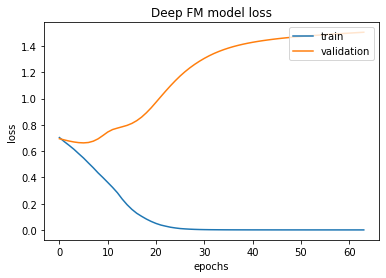

In [160]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Deep FM model loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend(['train', 'validation'], loc= 'upper right')
#plt.imshow()

* NFM with criteo dataset

In [198]:
from deepctr.models import NFM

In [225]:
model_nfm= NFM(linear_feature_cols,dnn_feature_cols,task='binary')
model_nfm.compile("adam", "binary_crossentropy",
              metrics=['binary_crossentropy'], )

In [226]:
model_nfm.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
C1 (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
C2 (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
C3 (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
C4 (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
C5 (InputL

In [227]:
history = model_nfm.fit(train_model_input, train[y].values,
                    batch_size=64, epochs=64, verbose=2, validation_split=0.2, )
pred_ans = model_nfm.predict(test_model_input, batch_size=64)

Train on 128 samples, validate on 32 samples
Epoch 1/64
 - 3s - loss: 0.7446 - binary_crossentropy: 0.7446 - val_loss: 0.7140 - val_binary_crossentropy: 0.7140
Epoch 2/64
 - 0s - loss: 0.7128 - binary_crossentropy: 0.7128 - val_loss: 0.7003 - val_binary_crossentropy: 0.7003
Epoch 3/64
 - 0s - loss: 0.6806 - binary_crossentropy: 0.6806 - val_loss: 0.6883 - val_binary_crossentropy: 0.6883
Epoch 4/64
 - 0s - loss: 0.6512 - binary_crossentropy: 0.6512 - val_loss: 0.6777 - val_binary_crossentropy: 0.6777
Epoch 5/64
 - 0s - loss: 0.6211 - binary_crossentropy: 0.6211 - val_loss: 0.6689 - val_binary_crossentropy: 0.6689
Epoch 6/64
 - 0s - loss: 0.5920 - binary_crossentropy: 0.5920 - val_loss: 0.6622 - val_binary_crossentropy: 0.6622
Epoch 7/64
 - 0s - loss: 0.5637 - binary_crossentropy: 0.5637 - val_loss: 0.6580 - val_binary_crossentropy: 0.6580
Epoch 8/64
 - 0s - loss: 0.5397 - binary_crossentropy: 0.5397 - val_loss: 0.6568 - val_binary_crossentropy: 0.6567
Epoch 9/64
 - 0s - loss: 0.5146 - b

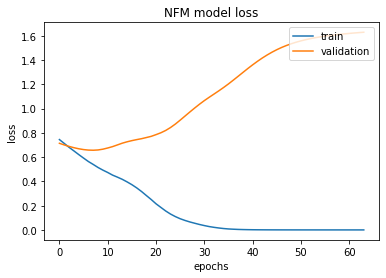

In [228]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('NFM model loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend(['train', 'validation'], loc= 'upper right')
#plt.imshow()

* Regression with **movielens dataset** sample

In [229]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from deepctr.models import DeepFM
from deepctr.inputs import SparseFeat,get_fixlen_feature_names

In [334]:
data = pd.read_csv('./movielens_sample.txt')
data.head(4)

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,3299,235,4,968035345,Ed Wood (1994),Comedy|Drama,F,25,4,19119
1,3630,3256,3,966536874,Patriot Games (1992),Action|Thriller,M,18,4,77005
2,517,105,4,976203603,"Bridges of Madison County, The (1995)",Drama|Romance,F,25,14,55408
3,785,2115,3,975430389,Indiana Jones and the Temple of Doom (1984),Action|Adventure,M,18,19,29307


* Employing only 2 features to train & validate

In [311]:
sparse_features = ["movie_id", "user_id"]
y= ['rating']

In [312]:
for feat in sparse_features:
        lbe = LabelEncoder()
        data[feat] = lbe.fit_transform(data[feat])
    # 2.count #unique features for each sparse field

In [313]:
data.head(4)

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,107,12,4,968035345,Ed Wood (1994),Comedy|Drama,F,25,4,19119
1,123,169,3,966536874,Patriot Games (1992),Action|Thriller,M,18,4,77005
2,12,6,4,976203603,"Bridges of Madison County, The (1995)",Drama|Romance,F,25,14,55408
3,21,112,3,975430389,Indiana Jones and the Temple of Doom (1984),Action|Adventure,M,18,19,29307


In [315]:
fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique()) for feat in sparse_features]
linear_feature_columns = fixlen_feature_columns

In [ ]:
print(linear_feature_columns)

In [317]:
dnn_feature_columns = fixlen_feature_columns
fixlen_feature_names = get_fixlen_feature_names(linear_feature_columns + dnn_feature_columns)
print(fixlen_feature_names)

['movie_id', 'user_id']


In [318]:
train, test = train_test_split(data, test_size=0.2)
train_model_input = [train[name].values for name in fixlen_feature_names]#includes values from only data[user_id], data[movie_id]
test_model_input = [test[name].values for name in fixlen_feature_names]#includes values from only data[user_id], data[movie_id]

In [326]:
print('no. of columns included in train & test:', len(train_model_input))

no. of columns included in train & test: 2


In [320]:
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie_id (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
user_id (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
sparse_emb_movie_id (Embedding) (None, 1, 8)         1496        movie_id[0][0]                   
__________________________________________________________________________________________________
sparse_emb_user_id (Embedding)  (None, 1, 8)         1544        user_id[0][0]                    
__________________________________________________________________________________________________
concatenat

In [321]:
history = model.fit(train_model_input, train[y].values, batch_size=64, epochs=64, verbose=2, validation_split=0.2,)

Train on 128 samples, validate on 32 samples
Epoch 1/64
 - 3s - loss: 13.7675 - mean_squared_error: 13.7675 - val_loss: 14.6102 - val_mean_squared_error: 14.6102
Epoch 2/64
 - 0s - loss: 13.5407 - mean_squared_error: 13.5407 - val_loss: 14.3906 - val_mean_squared_error: 14.3906
Epoch 3/64
 - 0s - loss: 13.2866 - mean_squared_error: 13.2866 - val_loss: 14.1369 - val_mean_squared_error: 14.1369
Epoch 4/64
 - 0s - loss: 13.0010 - mean_squared_error: 13.0010 - val_loss: 13.8493 - val_mean_squared_error: 13.8493
Epoch 5/64
 - 0s - loss: 12.6718 - mean_squared_error: 12.6718 - val_loss: 13.5271 - val_mean_squared_error: 13.5271
Epoch 6/64
 - 0s - loss: 12.3047 - mean_squared_error: 12.3047 - val_loss: 13.1683 - val_mean_squared_error: 13.1683
Epoch 7/64
 - 0s - loss: 11.8879 - mean_squared_error: 11.8879 - val_loss: 12.7699 - val_mean_squared_error: 12.7699
Epoch 8/64
 - 0s - loss: 11.4233 - mean_squared_error: 11.4233 - val_loss: 12.3314 - val_mean_squared_error: 12.3314
Epoch 9/64
 - 0s - 

In [323]:
test.head(4)

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
168,116,133,3,986327282,True Crime (1999),Crime|Thriller,F,45,7,30260
151,40,93,4,974833328,Love and Death on Long Island (1997),Comedy|Drama,M,35,4,98125
34,86,72,5,974435324,Young Frankenstein (1974),Comedy|Horror,M,50,1,37932
127,106,182,2,979767184,"Running Man, The (1987)",Action|Adventure|Sci-Fi,M,25,20,02062


In [325]:
pred_ans = model.predict(test_model_input, batch_size=64)
print(pred_ans[:4])

[[2.3619075]
 [3.6966498]
 [3.6399324]
 [2.3619068]]


In [327]:
print("test MSE", round(mean_squared_error(test[y].values, pred_ans), 4))

test MSE 2.426


In [328]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

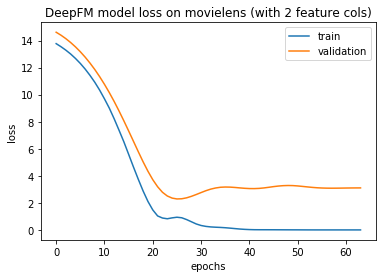

In [329]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DeepFM model loss on movielens (with 2 feature cols)')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend(['train', 'validation'], loc= 'upper right')
#plt.imshow()

* Employing 6 features to train & validate

In [336]:
sparse_features_ext = ["movie_id", "user_id","gender", "age", "occupation", "zip"]
y= ['rating']

In [337]:
for feat in sparse_features_ext:
        lbe = LabelEncoder()
        data[feat] = lbe.fit_transform(data[feat])

In [338]:
data.head(4)

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,107,12,4,968035345,Ed Wood (1994),Comedy|Drama,0,2,4,35
1,123,169,3,966536874,Patriot Games (1992),Action|Thriller,1,1,4,118
2,12,6,4,976203603,"Bridges of Madison County, The (1995)",Drama|Romance,0,2,13,99
3,21,112,3,975430389,Indiana Jones and the Temple of Doom (1984),Action|Adventure,1,1,18,55


In [339]:
fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique()) for feat in sparse_features_ext]
linear_feature_columns = fixlen_feature_columns

In [346]:
#unique features for each sparse field
linear_feature_columns

[SparseFeat(name='movie_id', dimension=187, use_hash=False, dtype='int32', embedding_name='movie_id', embedding=True),
 SparseFeat(name='user_id', dimension=193, use_hash=False, dtype='int32', embedding_name='user_id', embedding=True),
 SparseFeat(name='gender', dimension=2, use_hash=False, dtype='int32', embedding_name='gender', embedding=True),
 SparseFeat(name='age', dimension=7, use_hash=False, dtype='int32', embedding_name='age', embedding=True),
 SparseFeat(name='occupation', dimension=20, use_hash=False, dtype='int32', embedding_name='occupation', embedding=True),
 SparseFeat(name='zip', dimension=188, use_hash=False, dtype='int32', embedding_name='zip', embedding=True)]

In [341]:
dnn_feature_columns = fixlen_feature_columns
fixlen_feature_names = get_fixlen_feature_names(linear_feature_columns + dnn_feature_columns)
print(fixlen_feature_names)

['movie_id', 'user_id', 'gender', 'age', 'occupation', 'zip']


In [342]:
train, test = train_test_split(data, test_size=0.2)
train_model_input = [train[name].values for name in fixlen_feature_names]
test_model_input = [test[name].values for name in fixlen_feature_names]

In [343]:
print('no. of columns included in train & test:', len(train_model_input))

no. of columns included in train & test: 6


In [371]:
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )

In [372]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie_id (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
user_id (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
gender (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
age (InputLayer)                (None, 1)            0                                            
__________________________________________________________________________________________________
occupation

In [373]:
history_dfm = model.fit(train_model_input, train[y].values, batch_size=64, epochs=64, verbose=2, validation_split=0.2, )

Train on 128 samples, validate on 32 samples
Epoch 1/64
 - 3s - loss: 14.2737 - mean_squared_error: 14.2737 - val_loss: 13.3993 - val_mean_squared_error: 13.3993
Epoch 2/64
 - 0s - loss: 13.9940 - mean_squared_error: 13.9940 - val_loss: 13.1372 - val_mean_squared_error: 13.1372
Epoch 3/64
 - 0s - loss: 13.6685 - mean_squared_error: 13.6685 - val_loss: 12.8351 - val_mean_squared_error: 12.8351
Epoch 4/64
 - 0s - loss: 13.2909 - mean_squared_error: 13.2909 - val_loss: 12.4838 - val_mean_squared_error: 12.4838
Epoch 5/64
 - 0s - loss: 12.8455 - mean_squared_error: 12.8455 - val_loss: 12.0745 - val_mean_squared_error: 12.0745
Epoch 6/64
 - 0s - loss: 12.3442 - mean_squared_error: 12.3442 - val_loss: 11.5997 - val_mean_squared_error: 11.5997
Epoch 7/64
 - 0s - loss: 11.7308 - mean_squared_error: 11.7308 - val_loss: 11.0512 - val_mean_squared_error: 11.0512
Epoch 8/64
 - 0s - loss: 11.0282 - mean_squared_error: 11.0282 - val_loss: 10.4189 - val_mean_squared_error: 10.4189
Epoch 9/64
 - 0s - 

In [349]:
test.head(4)

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
120,173,50,3,960502974,That Thing You Do! (1996),Comedy,1,1,11,134
191,126,32,2,966287116,Sliver (1993),Thriller,1,4,7,56
105,148,114,3,963903103,St. Elmo's Fire (1985),Drama|Romance,0,2,1,141
152,178,170,2,959833154,Mission to Mars (2000),Sci-Fi,0,2,6,8


In [350]:
pred_ans = model.predict(test_model_input, batch_size=256)#test predictions with taking values from 6 columns into account
print(pred_ans[:4])

[[3.4987173]
 [2.380477 ]
 [2.4953108]
 [2.4854414]]


In [351]:
print("test MSE", round(mean_squared_error(test[y].values, pred_ans), 4))

test MSE 2.0619


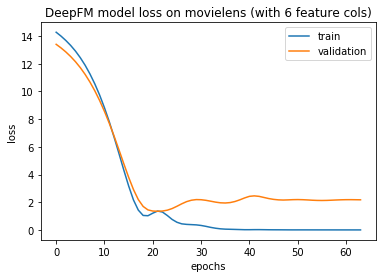

In [352]:
plt.plot(history_dfm.history['loss'])
plt.plot(history_dfm.history['val_loss'])
plt.title('DeepFM model loss on movielens (with 6 feature cols)')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend(['train', 'validation'], loc= 'upper right')
#plt.imshow()

* Comparing results on movielens (6 feat. cols) between DeepFM & NFM

In [368]:
model_nfm= NFM(linear_feature_columns, dnn_feature_columns, task='regression')
model_nfm.compile("adam", "mse", metrics=['mse'], )
model_nfm.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie_id (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
user_id (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
gender (InputLayer)             (None, 1)            0                                            
__________________________________________________________________________________________________
age (InputLayer)                (None, 1)            0                                            
__________________________________________________________________________________________________
occupation

In [369]:
history_nfm = model_nfm.fit(train_model_input, train[y].values, batch_size=64, epochs=64, verbose=2, validation_split=0.2, )

Train on 128 samples, validate on 32 samples
Epoch 1/64
 - 3s - loss: 14.2744 - mean_squared_error: 14.2744 - val_loss: 13.4148 - val_mean_squared_error: 13.4148
Epoch 2/64
 - 0s - loss: 14.0211 - mean_squared_error: 14.0211 - val_loss: 13.1835 - val_mean_squared_error: 13.1835
Epoch 3/64
 - 0s - loss: 13.7467 - mean_squared_error: 13.7467 - val_loss: 12.9340 - val_mean_squared_error: 12.9340
Epoch 4/64
 - 0s - loss: 13.4571 - mean_squared_error: 13.4571 - val_loss: 12.6565 - val_mean_squared_error: 12.6565
Epoch 5/64
 - 0s - loss: 13.1312 - mean_squared_error: 13.1312 - val_loss: 12.3547 - val_mean_squared_error: 12.3547
Epoch 6/64
 - 0s - loss: 12.7848 - mean_squared_error: 12.7848 - val_loss: 12.0236 - val_mean_squared_error: 12.0236
Epoch 7/64
 - 0s - loss: 12.4123 - mean_squared_error: 12.4123 - val_loss: 11.6623 - val_mean_squared_error: 11.6623
Epoch 8/64
 - 0s - loss: 12.0018 - mean_squared_error: 12.0018 - val_loss: 11.2703 - val_mean_squared_error: 11.2703
Epoch 9/64
 - 0s - 

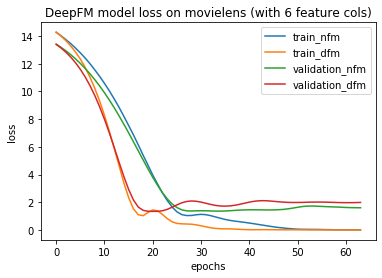

In [374]:
plt.plot(history_nfm.history['loss'])
plt.plot(history_dfm.history['loss'])

plt.plot(history_nfm.history['val_loss'])
plt.plot(history_dfm.history['val_loss'])


plt.title('DeepFM model loss on movielens (with 6 feature cols)')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend(['train_nfm','train_dfm', 'validation_nfm','validation_dfm' ], loc= 'upper right')
#plt.imshow()